# IMPORTING LIBRARIES

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se

import warnings
warnings.filterwarnings('ignore')

# Reading CSV file

In [131]:
loan = pd.read_csv("loan.csv")

observation : warning saying columns(47) have mixed data type, to overcome this we could set dtype = object when importing files and later convert required columns to specific dtype

# Sanity check

In [132]:
#checking shape of file
print(loan.shape)

(39717, 111)


In [133]:
#info
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [134]:
#check data types of each column
print(loan.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


# DATA CLEANING

. Removing Null columns and rows <br>
. Deleting columns with single unique value <br>
. Deleting columns that don't add any value for Analysis<br>
. Modifying Null values<br>
. Modifying Data type for required analysis<br>
. Removing symbols/string to derive relevent data<br>

In [135]:
# checking rows with number of nulls
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [136]:
#checking rows to find number of rows having all null value

print(loan.isnull().all(axis=1).sum())

#no rows with all null value

0


In [137]:
#checking rows to find number of columns having all null value

print(loan.isnull().all(axis=0).sum())

# 54 rows with all null value

54


In [138]:
#removing null rows, as seen in spread sheet column 54 to 111 are all null

loan.drop(loan.iloc[:, 53:105], inplace = True, axis = 1) 
loan.shape

(39717, 59)

In [139]:
#dropping columns that have mostly null values and are not required


columns_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","emp_title","member_id","url","tax_liens","zip_code","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit","next_pymnt_d","mths_since_last_major_derog"]
loan.drop(labels = columns_drop_list1, axis =1, inplace=True)


In [140]:
#after removing null and not required columns
loan.shape

(39717, 45)

In [141]:
#now we will check columns with unique ID and delete thoes columns
loan.nunique()

id                            39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
title                         19615
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                   

In [142]:
#dropping columns that have all same unique values


columns_drop_list2 = ["application_type","collections_12_mths_ex_med","policy_code","initial_list_status","pymnt_plan"]
loan.drop(labels = columns_drop_list2, axis =1, inplace=True)
loan.shape

(39717, 40)

. Company wants to know which loan applications are risky, so fields made after loan was approved can be deleted.

In [143]:
columns_drop_list3 = ["id","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan.drop(columns=columns_drop_list3, inplace=True)
loan.shape

(39717, 27)

Now we will replace null values to appropriate values, and convert data to appropriate type from above observation we will do data cleaning for below columns: <br>
. term - We will remove srting "months" and convert it to numeric value. <br>
. int_rate - Removing '%' symbol anf changing type to float <br>
. revol_util - Removing '%' symbol anf changing type to float <br>
. emp_length - Modifying it by removing string 'year' and replacing null with 0, converting dtype to int<br>


In [144]:
#emp_length - Modifying it by removing string 'year' and replacing null with 0, converting dtype to int

#replaced null with 0
loan.emp_length.fillna('0',inplace=True)

#removing 'year' 
loan['emp_length']=loan.emp_length.str.extract('(\d+)') #\d used as placeholder for numeric value

#changing dtype to int
loan['emp_length'] = loan['emp_length'].apply(pd.to_numeric)


In [145]:
# removing '%' symbol from int_rate and converting to float
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['int_rate'] = loan['int_rate'].astype(float)

# removing '%' symbol from revol_util
loan['revol_util'] = loan['revol_util'].str.rstrip('%')
loan['revol_util'] = loan['revol_util'].astype(float)


In [146]:
#now for pub_rec_bankruptcies we see many null values, we will replace it.
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)


In [147]:
loan.home_ownership.value_counts()


RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [148]:
loan.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [149]:
# removing 'months' from term and converting column to int

loan['term'] = loan['term'].str.rstrip('months')
loan['term'] = loan['term'].astype(int)

In [150]:
#instalments can never be in flating point, so converting it to int, for ease of operation we will also convert funded amount inv to and int_rate to int
loan['installment']=loan['installment'].astype(int)

loan['funded_amnt_inv'] = loan['funded_amnt_inv'].astype(int)

loan['int_rate'] = loan['int_rate'].astype(int)

In [151]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

'Current' does not give us any info for analysis so we will drop the data with loan status as current

In [152]:

loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 27)

In [153]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

we will split the column as month and year

In [154]:
month,year = loan['issue_d'].str.split('-').str

In [155]:
loan['issue_month'] = month
loan['issue_year'] = pd.to_numeric(year)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975,36,10,162,B,B2,10,RENT,...,Jan-85,1,3,0,13648,83.7,9,0.0,Dec,11
1,2500,2500,2500,60,15,59,C,C4,1,RENT,...,Apr-99,5,3,0,1687,9.4,4,0.0,Dec,11
2,2400,2400,2400,36,15,84,C,C5,10,RENT,...,Nov-01,2,2,0,2956,98.5,10,0.0,Dec,11
3,10000,10000,10000,36,13,339,C,C1,10,RENT,...,Feb-96,1,10,0,5598,21.0,37,0.0,Dec,11
5,5000,5000,5000,36,7,156,A,A4,3,RENT,...,Nov-04,3,9,0,7963,28.3,12,0.0,Dec,11


Now that most of the data cleaning is done let's do some data analysis

In [156]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv           int32
term                      int32
int_rate                  int32
installment               int32
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies     object
issue_month              object
issue_year                int64
dtype: object

# Univariate Analysis

Univariate analysis is analysis based on single variable. <br>
1. We will analyse quantitative variable like: <br>
    Loan Amount <br> 
    Anual Income <br>
    Interest Rate <br>
    
2. We will analyse categorical variable like: <br>
    Loan Status <br> 
    Grade <br>
    Employee Length <br> 

count    38191.000000
mean     10962.265979
std       7266.157660
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

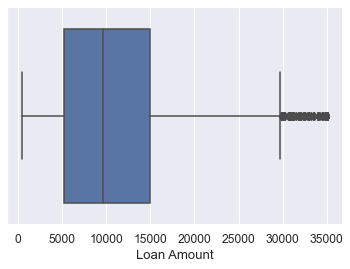

In [179]:
# we will use describe() and boxplot to check the statistics
se.boxplot(loan.loan_amnt) #quantitative variable
plt.xlabel('Loan Amount')
loan.loan_amnt.describe()

Obeservation: Loan amount varies from 0 to 35,000 with mean approx. 10,000

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

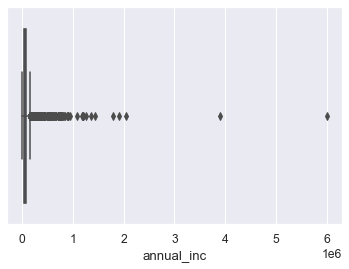

In [158]:
se.boxplot(loan.annual_inc)

loan.annual_inc.describe()

Observation: We see 2 outliers in loan.anual_inn. i.e only 2 emp have salary greater than 4 lakhs, so we will remove outlier for better analysis

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

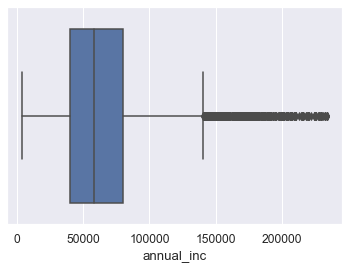

In [159]:
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]
se.boxplot(loan.annual_inc)
loan.annual_inc.describe()

Observation : We see how outliers majorly affect the mean median of the analysis

count    38191.000000
mean        11.343222
std          3.718242
min          5.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         24.000000
Name: int_rate, dtype: float64

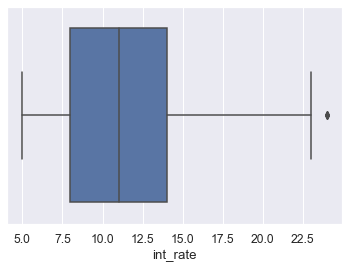

In [160]:
#converting int_rate to int for analysis
loan.int_rate = loan.int_rate.astype(int)

se.boxplot(loan.int_rate)

loan['int_rate'].describe()

Observations : Box plot represents statistical analysis of describe() such as mean, median, min, max, 25 percentila, 50% and 75th %

In [161]:
loan['loan_status'].value_counts()

Fully Paid     32607
Charged Off     5584
Name: loan_status, dtype: int64

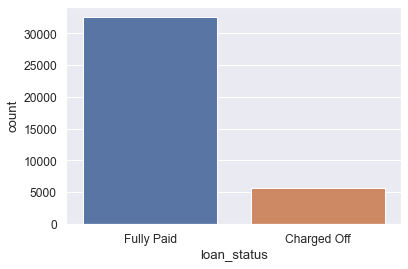

In [162]:
se.countplot(x= loan["loan_status"]) #unordered categorical variable
plt.show()

Observation :  Most of the Loans are paid around 15% of loans are charged off

In [163]:
loan['grade'].value_counts()

B    11581
A     9977
C     7753
D     5027
E     2610
F      954
G      289
Name: grade, dtype: int64

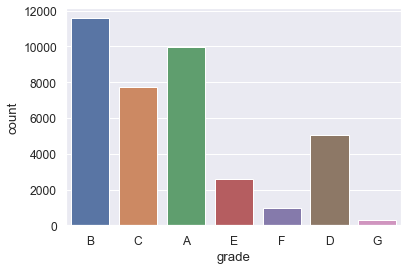

In [164]:
se.countplot(x='grade', data=loan)
plt.show()

Observation : Most of the loans are grade A and B, so most of the loans are high grade loans

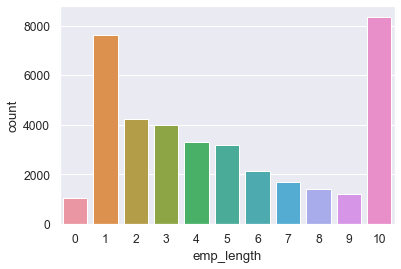

In [165]:
se.countplot(x='emp_length', data=loan)
plt.show()

Observation : Most of the Employes with 1 and 10+ year experience have applied for oan

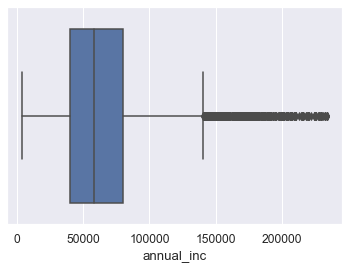

In [166]:
se.boxplot(x=loan['annual_inc'])
plt.show()

In [167]:
loan.loan_amnt.value_counts()

10000    2787
12000    2230
5000     2018
6000     1879
15000    1821
         ... 
16550       1
17900       1
13175       1
11275       1
22550       1
Name: loan_amnt, Length: 867, dtype: int64

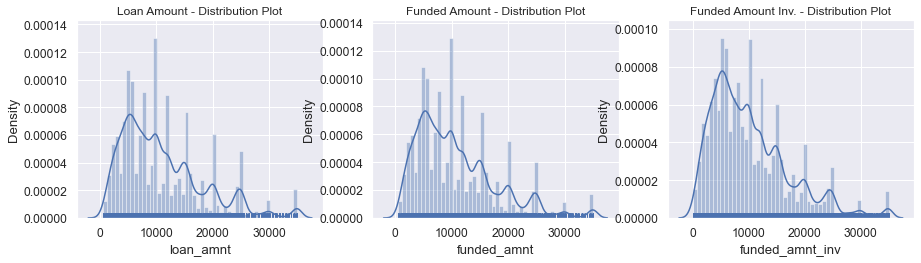

In [168]:
# Lets see distribution of three loan amount fields using distribution plot. Quantitative Variables

plt.figure(figsize=(15,8),facecolor='w')

# subplot 1
plt.subplot(2, 3, 1)
ax = se.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=12)

# subplot 2
plt.subplot(2, 3, 2)
ax = se.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=12)

# subplot 2
plt.subplot(2, 3, 3)
ax = se.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=12)

plt.show()


Observation: Most of the plot are leaned towards left. we will e considering only loan amount for further analysis

# Segmented univariate variable

Now our aim is to check the Defaulters based on variables such as purpose of loan tem, house ownership

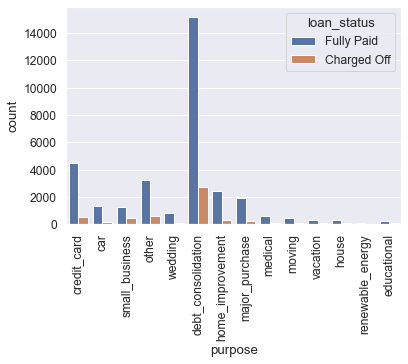

In [169]:
# unordered categorical variable

se.countplot(x='purpose', hue="loan_status", data=loan)
plt.xticks(rotation=90)
plt.show()

Observation : The number of loan taken for debth consolidation is high. the charged off is also high for this purpose.

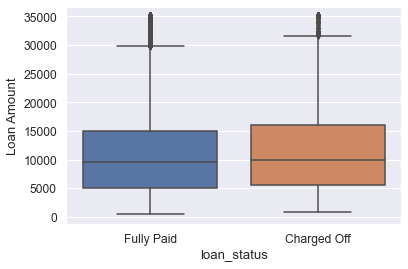

In [170]:
#lets see corelation between fully paid and charged off loan statu
se.boxplot( y="loan_amnt", x='loan_status' , data=loan)
plt.ylabel('Loan Amount')
plt.show()

Observation : the mean of fully paid loan amount and charged off amount is same.

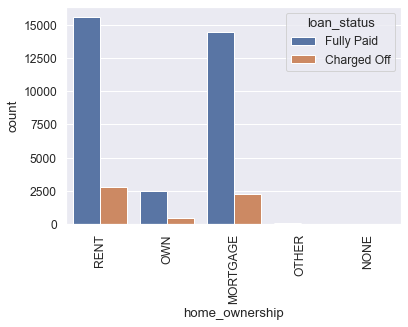

In [171]:
se.countplot(x='home_ownership', hue="loan_status", data=loan)
plt.xticks(rotation=90)
plt.show()

Observation :  For above plot shows that most of them living in rented home or have mortgazed their home have Applicant numbers higher for these categories so charged off is high too.

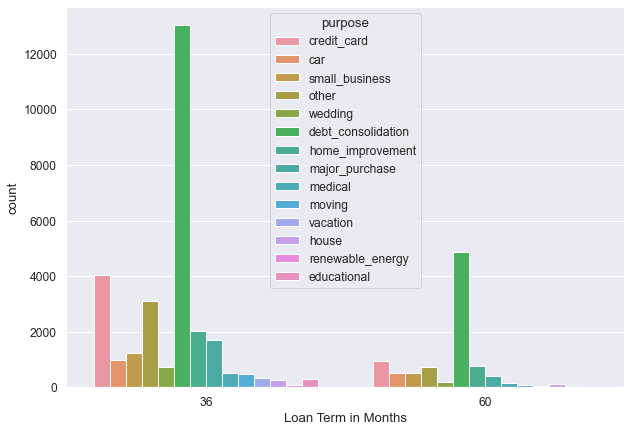

In [172]:
# Lets see loan in term of months
plt.figure(figsize=(10,7))
se.countplot( x="term", hue='purpose', data=loan)
plt.xlabel('Loan Term in Months')
plt.show()

Observation : Loan taken for debt consolidation for 36 months is high. Most of the loans are taken for 36 months then 60 months

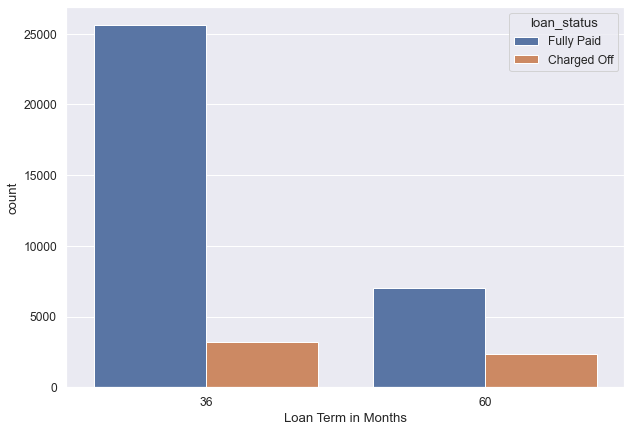

In [180]:
# Lets see loan in term of loan status
plt.figure(figsize=(10,7))
se.countplot( x="term", hue='loan_status', data=loan)
plt.xlabel('Loan Term in Months')
plt.show()

Observation : Loan taken for 60 months have greater % of charged off as compared to loan taken for 36 months

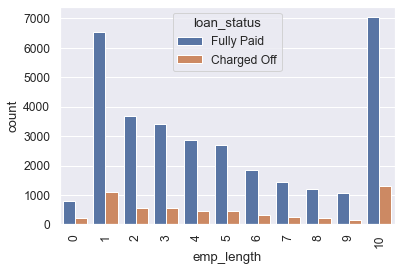

In [181]:
se.countplot(x='emp_length', hue="loan_status", data=loan)
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

Bivariate Analysis - Correlation Matrix-Quantitative Variables Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

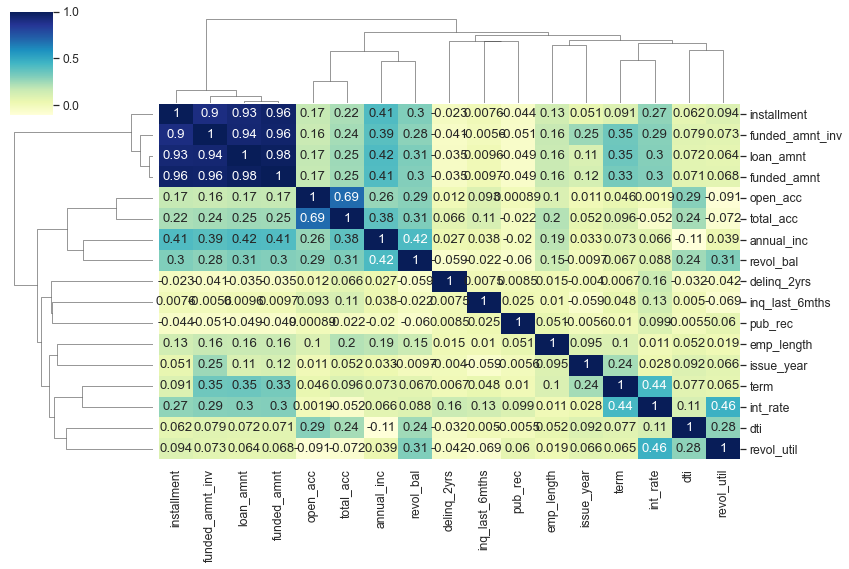

In [174]:
loan_correlation = loan.corr()
se.set(font_scale=1.1)
se.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="YlGnBu")
plt.show()

Observation : <br>
. Funded amount, Loan amount, Invester amount are closely related <br>
. Positive correlation between annual income and employment years.That means income increases with work experience <br>

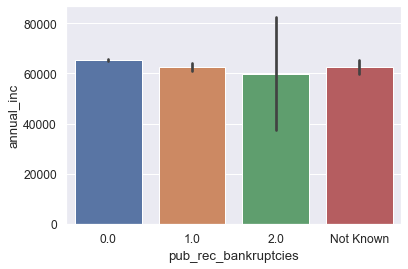

In [175]:
se.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=loan)
plt.show()

Now we have seen above impact of columns on loan_status, now we will take group of varaiables together and analyse it's impact on loan status.<br>


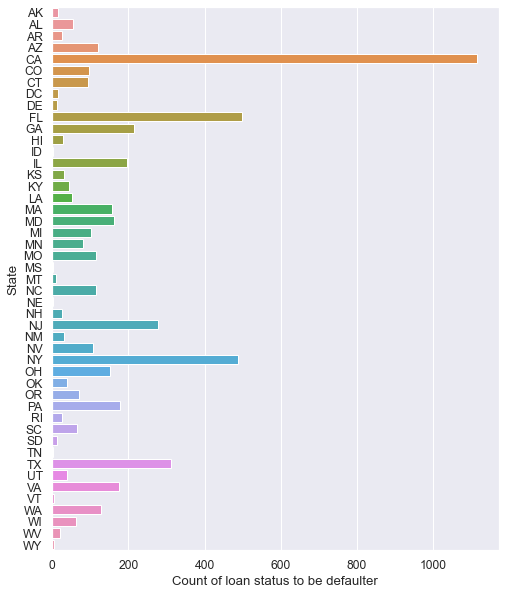

In [176]:
graph = loan[loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index() #creating a derived dataset 

plt.figure(figsize=(8,10))

se.barplot(y='addr_state', x='loan_status', data=graph)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

Observation : state of CA has the highest defaulter.

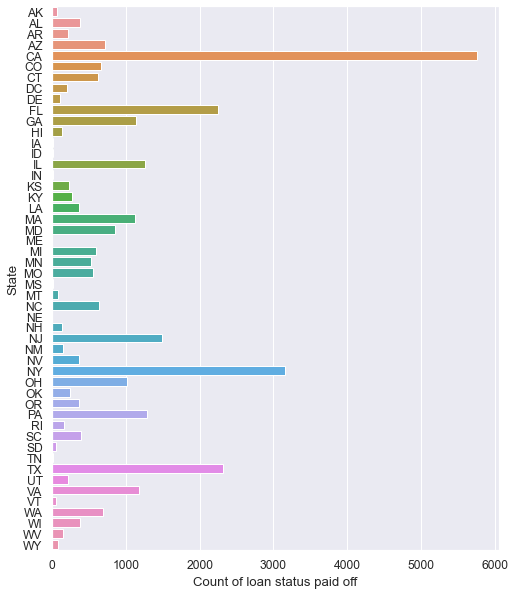

In [177]:
graph = loan[loan['loan_status']=='Fully Paid'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(8,10))
se.barplot(y='addr_state', x='loan_status', data=graph)
plt.xlabel('Count of loan status paid off')
plt.ylabel('State')
plt.show()

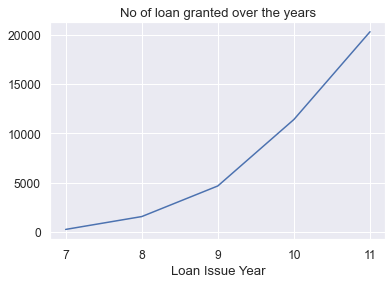

In [178]:
g = loan.groupby('issue_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

observation :  Loan requirement have increased over the period of time